In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

In [15]:
pandaData = pd.read_csv("test-score.csv")
pandaData.head() 
pandaData = pandaData.index(loc = 0 , column='A', value=np.zeros(100));

TypeError: 'RangeIndex' object is not callable

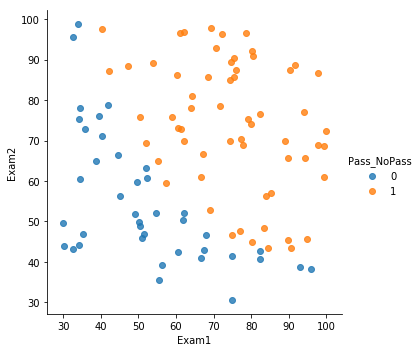

In [3]:
sns.lmplot(data = pandaData , x = "Exam1" , y = "Exam2" , hue = "Pass_NoPass" , fit_reg = False , height = 5, aspect = 1);

# Sigmod Function
This makes the sigmod function

In [4]:
def sigmoidFunction(x):
    g = 1.0 / (1 + np.exp(-x))
    return g;

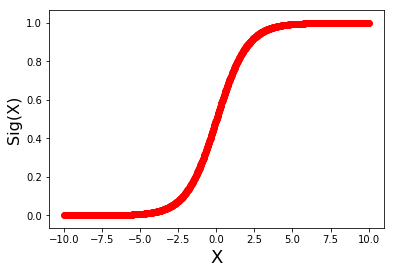

In [5]:
xLine = np.linspace(start = -10, stop = 10 , num=1000)
yLine = sigmoidFunction(xLine);
plt.scatter(xLine , yLine , color='r')
plt.xlabel('X', fontsize=18)
plt.ylabel('Sig(X)', fontsize=16)
plt.show()


# Hypothesis
A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.
![1_p4hyc2vwjqolwwl_mv0vjw](https://user-images.githubusercontent.com/13907836/47976539-c9ff3880-e067-11e8-9fc2-6b6372864cf5.png)

In [6]:
def hpothesisFunction():
    
    return

In [7]:
npData = pandaData.values; # Covert to NP Array
X = npData[: , 0:2];
y = npData[: , -1];

print(y)
M , numOfFeatures = X.shape;

thetas = np.zeros(numOfFeatures)

# Dot product of Data(M x N) * (N x 1) = (M x 1)
z = np.dot(X , thetas);
h = sigmoidFunction(z);
print(h)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


# Loss function
Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:
![1_fdxes8iv_43q8caltcjnow](https://user-images.githubusercontent.com/13907836/47976510-9d4b2100-e067-11e8-864c-3cdb99caa8e8.png)

In [8]:
def loss(h, y):
    l = (-y * np.log(h) - (1 - y) * np.log(1 - h));
    calcLoss = l.mean();
    return calcLoss

In [9]:
a = loss(h , y)
print(a)

0.6931471805599453


# Gradient descent
Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.
![1_gobkggbrwdaovfaan_hjxq](https://user-images.githubusercontent.com/13907836/47976845-67a73780-e069-11e8-8e73-2158c0cc8e5d.png)



In [10]:
nSamples = X.shape[0];
gradient = np.dot(X.T, (h - y)) / nSamples
print(gradient)

[-12.00921659 -11.26284221]


Then we update the weights by substracting to them the derivative times the learning rate.

In [11]:
npData = pandaData.values; # Covert to NP Array
X = npData[: , 0:2];
y = npData[: , -1];

# weights initialization
theta = np.zeros(X.shape[1])
lr = 0.01;

num_iter = 300000

for i in range(num_iter):
    z = np.dot(X,theta)
    h = sigmoidFunction(z);
    gradient = np.dot(X.T, (h - y)) / y.size;
    theta -= lr * gradient;

    if(i % 10000 == 0):
      #  z = np.dot(X, self.theta)
     #   h = self.__sigmoid(z)
        print('Theta[',i,']: ', theta);

Theta[ 0 ]:  [0.12009217 0.11262842]
Theta[ 10000 ]:  [ 0.14783561 -0.32547179]
Theta[ 20000 ]:  [0.56079203 0.10236272]
Theta[ 30000 ]:  [ 0.35266283 -0.11611885]
Theta[ 40000 ]:  [ 0.14783561 -0.32547179]
Theta[ 50000 ]:  [0.56079203 0.10236272]
Theta[ 60000 ]:  [ 0.35266283 -0.11611885]
Theta[ 70000 ]:  [ 0.14783561 -0.32547179]
Theta[ 80000 ]:  [0.56079203 0.10236272]
Theta[ 90000 ]:  [ 0.35266283 -0.11611885]
Theta[ 100000 ]:  [ 0.14783561 -0.32547179]
Theta[ 110000 ]:  [0.56079203 0.10236272]
Theta[ 120000 ]:  [ 0.35266283 -0.11611885]
Theta[ 130000 ]:  [ 0.14783561 -0.32547179]
Theta[ 140000 ]:  [0.56079203 0.10236272]
Theta[ 150000 ]:  [ 0.35266283 -0.11611885]
Theta[ 160000 ]:  [ 0.14783561 -0.32547179]
Theta[ 170000 ]:  [0.56079203 0.10236272]
Theta[ 180000 ]:  [ 0.35266283 -0.11611885]
Theta[ 190000 ]:  [ 0.14783561 -0.32547179]
Theta[ 200000 ]:  [0.56079203 0.10236272]
Theta[ 210000 ]:  [ 0.35266283 -0.11611885]
Theta[ 220000 ]:  [ 0.14783561 -0.32547179]
Theta[ 230000 ]:  

# Plot

Final Theta:  [0.56079203 0.10236272]


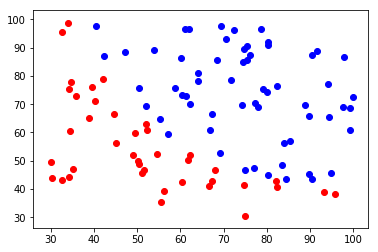

In [12]:
print("Final Theta: " , theta);
x = npData[:, 0];
y = npData[:, 1];

data_pass_label   = np.where(pandaData["Pass_NoPass"] == True)[0]
data_nopass_label = np.where(pandaData["Pass_NoPass"] == False)[0]

plt.scatter(x[data_pass_label] , y[data_pass_label] , color='b')
plt.scatter(x[data_nopass_label] , y[data_nopass_label] , color='r')

